In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 27.2 MB/s eta 0:00:00


In [ ]:
!pip install pydot

In [ ]:
from transformers import AutoTokenizer, TFAutoModel, TFAutoModelForMaskedLM

In [ ]:
dataset = load_dataset("orieg/elsevier-oa-cc-by")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for orieg/elsevier-oa-cc-by contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/orieg/elsevier-oa-cc-by
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datas

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

In [ ]:
elsevier_dataset = dataset

In [ ]:
print(elsevier_dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 32072
    })
    test: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4008
    })
    validation: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4009
    })
})


In [ ]:
train_set = elsevier_dataset['train']
train_df = pd.DataFrame(train_set)
print("Shape of the training set:", train_df.shape)


Shape of the training set: (32072, 7)


Check for class Imbalance

In [ ]:
val_set = elsevier_dataset['validation']
val_df = pd.DataFrame(val_set)

test_set = elsevier_dataset['test']
test_df = pd.DataFrame(test_set)

In [ ]:
print(val_df.shape)
print(test_df.shape)

(4009, 7)
(4008, 7)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              32072 non-null  object
 1   abstract           32072 non-null  object
 2   subjareas          32072 non-null  object
 3   keywords           32072 non-null  object
 4   asjc               32072 non-null  object
 5   body_text          32072 non-null  object
 6   author_highlights  32072 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None


In [ ]:
train_df.head()

,title,abstract,subjareas,keywords,asjc,body_text,author_highlights
0,Dynamic Construction of Reduced Representation...,"In a decision task, Zhan et al. visualize with...","[AGRI, BIOC]","[MEG, SIR, ambiguous perception, brain dynamic...","[1100, 1300]","[In this task, we used Dali’s painting Slave M...",[We show how the brain reduces high-dimensiona...
1,Exposure to endocrine disruptors 17alpha-ethin...,Endocrine disruptors (EDs) are compounds that ...,[PHAR],"[17alpha-ethinylestradiol, Benzo[a]pyrene, Cyt...",[3005],[The term “endocrine disruptor” (ED) is used f...,[17α-ethinylestradiol (EE2) and estradiol affe...
2,The influence of somatosensory and muscular de...,Charcot-Marie-Tooth (CMT) disease is the most ...,"[MEDI, NEUR]","[Balance impairment, Charcot-Marie-Tooth disea...","[2716, 2728, 2735, 2808]",[Charcot–Marie–Tooth (CMT) disease represents ...,[We studied the role of sensory and muscular d...
3,"Autism, oxytocin and interoception",Autism is a pervasive developmental disorder c...,"[NEUR, PSYC]","[Active inference, Autism, Bayesian predictive...","[2802, 2805, 3206]","[This review presents cellular, anatomic, phys...",[We review the role of neuromodulation in inte...
4,Health risk assessment of Patulin intake throu...,This is the first report on assessing the non-...,[MULT],"[Daily intake, Food microbiology, Food science...",[1000],[Patulin is a mycotoxin secreted by different ...,[]


<!-- Drop All subjareas that have a frequency count of less than 1000 -->
Handle class Imbalance by merging some of the classes
Health, Dent, Nurs, Vent —> Medicine
9:28
Econ, Arts, Busi, Deci --> Soci
9:28
Math —> Multi

In [ ]:
def adjust_subjareas(subjareas_list):
    if any(area in subjareas_list for area in ['VETE', 'HEAL', 'DENT', 'NURS']):
        return ['MEDI']
    elif any(area in subjareas_list for area in ['ECON', 'ARTS', 'BUSI', 'DECI']):
        return ['SOCI']
    elif 'MATH' in subjareas_list:
        return ['MULT']
    else:
        return subjareas_list

train_df['subjareas'] = train_df['subjareas'].apply(adjust_subjareas)
val_df['subjareas'] = val_df['subjareas'].apply(adjust_subjareas)
test_df['subjareas'] = test_df['subjareas'].apply(adjust_subjareas)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(32072, 7)
(4009, 7)
(4008, 7)


In [ ]:
label_counts = pd.Series([label for sublist in train_df['subjareas'] for label in sublist]).value_counts()
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['Subject Area', 'Frequency']

fig = px.bar(label_counts_df, x='Subject Area', y='Frequency', title='Frequency of Each Subject Area Label')
fig.show()


step 2: Handle further class imbalance

Step 2: Data Pre-processing

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

def trim_text_to_word_limit(text, word_limit=200):
    if isinstance(text, list):
        text = ' '.join(text)
    elif text is None:
        return ""

    words = text.split()[:word_limit]
    return ' '.join(words)

def prepare_elsevier_data(train_df, val_df, test_df, abstract_column_name='abstract', body_text_column_name='body_text', label_column_name='subjareas'):
    """
    Prepares the Elsevier corpus splits for multi-label classification, handling abstract and body text,
    where body text might be a list and abstract a string. The abstract is limited to the first 200 words,
    and the body text to the first 300 words.

    Args:
    - train_df, val_df, test_df: DataFrames with 'abstract', 'body_text', and 'subjareas'.
    - abstract_column_name: Column name for abstracts.
    - body_text_column_name: Column name for body texts.
    - label_column_name: Column for labels.

    Returns:
    - Lists of concatenated texts for training, validation, testing, the labels, and unique label names.
    """
    mlb = MultiLabelBinarizer()
    all_labels = pd.concat([train_df[label_column_name], val_df[label_column_name], test_df[label_column_name]])
    mlb.fit(all_labels)

    train_labels = mlb.transform(train_df[label_column_name])
    val_labels = mlb.transform(val_df[label_column_name])
    test_labels = mlb.transform(test_df[label_column_name])

    concatenated_train_texts = [f"{trim_text_to_word_limit(abstract, 200)} [SEP] {trim_text_to_word_limit(body, 300)}" for abstract, body in zip(train_df[abstract_column_name], train_df[body_text_column_name])]
    concatenated_val_texts = [f"{trim_text_to_word_limit(abstract, 200)} [SEP] {trim_text_to_word_limit(body, 300)}" for abstract, body in zip(val_df[abstract_column_name], val_df[body_text_column_name])]
    concatenated_test_texts = [f"{trim_text_to_word_limit(abstract, 200)} [SEP] {trim_text_to_word_limit(body, 300)}" for abstract, body in zip(test_df[abstract_column_name], test_df[body_text_column_name])]

    return (concatenated_train_texts, train_labels,
            concatenated_val_texts, val_labels,
            concatenated_test_texts, test_labels,
            mlb.classes_)


concatenated_train_texts, train_labels, concatenated_val_texts, val_labels, concatenated_test_texts, test_labels, target_names = prepare_elsevier_data(train_df, val_df, test_df)


In [ ]:
print(train_labels[:2])
print(concatenated_train_texts[:2])
print(len(target_names))

[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
['In a decision task, Zhan et al. visualize within a new information theoretic framework the dynamic representation of visual information in brain activity. They demonstrate rapid reduction of behaviorally irrelevant information in the occipital cortex and a combination of the features that supports distinct decisions in the right fusiform gyrus. [SEP] In this task, we used Dali’s painting Slave Market with Disappearing Bust of Voltaire (see Figure 1A-a, Stimulus) because it contains a complex, ambiguous scene that observers perceive as either “the nuns” or “Voltaire.” We used the Bubbles technique [20] to break down the stimulus information into random samples for each experimental trial (see Figure 1A-a, Stimulus Sampling) to characterize the features that support each perceptual decision. We then recorded the observer’s response to each sample (whether they perceived “the nuns,” “Voltaire,” or selected “d

In [ ]:
print(len(concatenated_train_texts))
print(len(concatenated_val_texts))

32072
4009


In [ ]:
# Convert validation labels to a NumPy array
npvalid_labels = np.asarray(val_labels)
nptrain_labels = np.asarray(train_labels)
nptest_labels = np.asarray(test_labels)


step 3: Classification with fine tuned BERT Model

In [ ]:
model_checkpoint = 'allenai/scibert_scivocab_cased'

scibert_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

scibert_model = TFAutoModel.from_pretrained(model_checkpoint, from_pt=True)

scibert_mlm = TFAutoModelForMaskedLM.from_pretrained(model_checkpoint, from_pt=True)

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [ ]:
max_length = 500

In [ ]:
train_encodings = scibert_tokenizer(concatenated_train_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
valid_encodings = scibert_tokenizer(concatenated_val_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
test_encodings = scibert_tokenizer(concatenated_test_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')

step 3: Set maximum dimension length based on the data

Step 4: Apply tokenization process to  Elsevier corpus. Tokenization converts your text data into a format that the BERT model can understand and process. It involves splitting the text into tokens (words or subwords), truncating sequences to the maximum length (max_length), and padding shorter sequences with zeros.

In [ ]:
def print_encoding_shapes(encodings, encoding_type="Abstract"):
    """
    Prints the shapes of input_ids, token_type_ids, and attention_mask for given encodings.

    Args:
    - encodings: The tokenized encodings from the BERT tokenizer.
    - encoding_type: A string indicating the type of encoding (e.g., "Abstract" or "Body").
    """
    print(f"\n{encoding_type} Texts Encodings Shapes:")
    input_ids_shape = encodings.input_ids.shape
    token_type_ids_shape = encodings.token_type_ids.shape
    attention_mask_shape = encodings.attention_mask.shape

    print(f"Input IDs shape: {input_ids_shape}")
    print(f"Token Type IDs shape: {token_type_ids_shape}")
    print(f"Attention Mask shape: {attention_mask_shape}")

print_encoding_shapes(train_encodings, "concatenated train text")
print_encoding_shapes(valid_encodings, "concatenated val text")
print_encoding_shapes(test_encodings, "concatenated test text")


concatenated train text Texts Encodings Shapes:
Input IDs shape: (32072, 500)
Token Type IDs shape: (32072, 500)
Attention Mask shape: (32072, 500)

concatenated val text Texts Encodings Shapes:
Input IDs shape: (4009, 500)
Token Type IDs shape: (4009, 500)
Attention Mask shape: (4009, 500)

concatenated test text Texts Encodings Shapes:
Input IDs shape: (4008, 500)
Token Type IDs shape: (4008, 500)
Attention Mask shape: (4008, 500)


In [ ]:
import pandas as pd
import numpy as np

def compute_sample_weights(df, label_column):
    """
    Compute sample weights for multi-label classification.

    Parameters:
    - df: pandas DataFrame containing the training data
    - label_column: string name of the DataFrame column containing the labels lists

    Returns:
    - sample_weights: numpy array of sample weights where rows correspond to samples
    """
    label_freq = pd.Series([label for sublist in df[label_column] for label in sublist]).value_counts()

    label_weights = 1 / label_freq

    label_weights /= label_weights.sum()

    label_weight_map = label_weights.to_dict()

    sample_weights = []

    for labels in df[label_column]:
        sample_weight = sum([label_weight_map[label] for label in labels])
        sample_weights.append(sample_weight)

    return np.array(sample_weights)

sample_weights = compute_sample_weights(train_df, 'subjareas')


Step 4: Create a multiclass BERT model

multi-label binarization to convert the subject area labels into a binary format, where each label is represented by a 0 (absence) or 1 (presence).

BERT Model Configuration: A pre-trained BERT model (bert-base-cased) was chosen as the base for feature extraction. On top of it, a custom model was built for classification.

Custom Model: Added dense layers on top of BERT's pooled output, including a final dense layer with a sigmoid activation function to handle multi-label classification.

Loss Function: Used BinaryCrossentropy to treat each output label as an independent binary classification problem.
Optimizer: An Adam optimizer with a learning rate of 0.00005 was configured.


In [ ]:


def build_finetune_scibert(pretrained_model_name_or_path='allenai/scibert_scivocab_cased',
                           num_classes=18, max_length=500, hidden_size=[1024],
                           dropout=0.1, learning_rate=0.00005, from_pt=True,
                           unfreeze_layers=None):
    """
    Build and return a fine-tuned SciBERT model.

    Args:
        pretrained_model_name_or_path (str): The name or path of the pretrained model.
        num_classes (int): The number of classes for the classification task.
        max_length (int): The maximum sequence length for model inputs.
        hidden_size (list): A list of integers defining the sizes of hidden layers after SciBERT output.
        dropout (float): The dropout rate applied to the hidden layers.
        learning_rate (float): The learning rate for the Adam optimizer.
        from_pt (bool): Whether to convert the model from PyTorch.
        unfreeze_layers (list): A list of layer indices to unfreeze for training.

    Returns:
        tf.keras.Model: The compiled Keras model ready for training.
    """
    tf.keras.backend.clear_session()

    pretrained_LLM = TFAutoModel.from_pretrained(pretrained_model_name_or_path, from_pt=from_pt)
    pretrained_LLM.trainable = False

    if unfreeze_layers is not None:
        for layer_index in unfreeze_layers:
            try:
                pretrained_LLM.layers[0].encoder.layer[layer_index].trainable = True
            except IndexError:
                print(f"Layer {layer_index} not found in model. Model has {len(pretrained_LLM.layers[0].encoder.layer)} layers.")

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

    llm_inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

    llm_out = pretrained_LLM(llm_inputs)
    output_token = llm_out.last_hidden_state

    hidden = tf.math.reduce_mean(output_token, axis=1)

    for i, size in enumerate(hidden_size):
        hidden = tf.keras.layers.Dense(size, activation='relu', name=f'hidden_layer_{i}')(hidden)
        hidden = tf.keras.layers.Dropout(dropout)(hidden)

    output_classification = tf.keras.layers.Dense(num_classes, activation='sigmoid')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=[output_classification])

    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                                 metrics=['accuracy'])

    return classification_model


In [ ]:
num_subject_areas = len(target_names)
num_subject_areas

18

In [ ]:
unfreeze_layers = list(range(12))
scibert_model = build_finetune_scibert(pretrained_model_name_or_path=model_checkpoint,
                                       num_classes=num_subject_areas,
                                       max_length=max_length,
                                       unfreeze_layers=unfreeze_layers)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [ ]:
scibert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask (InputLayer  [(None, 500)]                0         []                            
 )                                                                                                
                                                                                                  
 input_ids (InputLayer)      [(None, 500)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1099384   ['attention_mask[0][0]',      
 )                           ngAndCrossAttentions(last_   32         'input_ids[0][0]']           
                             hidden_state=(None, 500, 7                                       

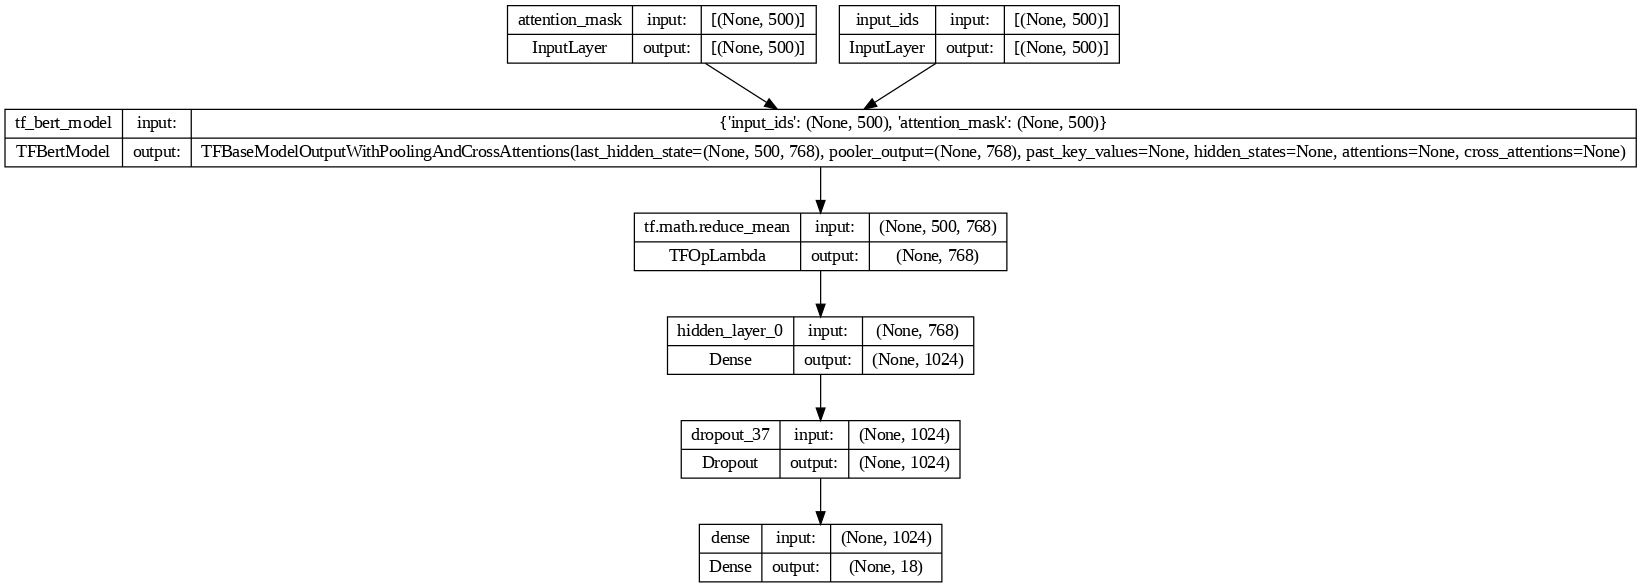

In [ ]:
keras.utils.plot_model(scibert_model, show_shapes=True, show_dtype=False, show_layer_names=True, dpi=90)

In [ ]:
#It takes 10 to 14 minutes to complete an epoch when using a GPU
model_history = scibert_model.fit(
    [train_encodings.input_ids, train_encodings.attention_mask],
    train_labels,
    validation_data=(
        [valid_encodings.input_ids, valid_encodings.attention_mask],
        val_labels
    ),
    batch_size=8,
    epochs=2,
    sample_weight=sample_weights
)

Epoch 1/2
4009/4009 [==============================] - 338s 82ms/step - loss: 0.0171 - accuracy: 0.4109 - val_loss: 0.1810 - val_accuracy: 0.4802
Epoch 2/2
4009/4009 [==============================] - 326s 81ms/step - loss: 0.0140 - accuracy: 0.5013 - val_loss: 0.1715 - val_accuracy: 0.5069


Validation Data Set Evaluation

In [ ]:
val_score = scibert_model.evaluate([valid_encodings.input_ids,  valid_encodings.attention_mask],
                                                  val_labels)

print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])

126/126 [==============================] - 33s 262ms/step - loss: 0.1715 - accuracy: 0.5069
Val loss: 0.1714937835931778
Val accuracy: 0.506859540939331


In [ ]:
val_predictions = scibert_model.predict([valid_encodings.input_ids, valid_encodings.attention_mask])

126/126 [==============================] - 36s 258ms/step


126/126 [==============================] - 33s 258ms/step
              precision    recall  f1-score   support

        AGRI       0.64      0.54      0.59       483
        BIOC       0.62      0.61      0.62       657
        CENG       0.46      0.36      0.40       179
        CHEM       0.48      0.41      0.44       236
        COMP       0.51      0.40      0.45       166
        EART       0.75      0.57      0.64       233
        ENER       0.64      0.53      0.58       253
        ENGI       0.59      0.50      0.54       427
        ENVI       0.55      0.74      0.63       555
        IMMU       0.48      0.59      0.53       251
        MATE       0.65      0.69      0.67       316
        MEDI       0.75      0.61      0.68       826
        MULT       0.95      0.47      0.63       424
        NEUR       0.78      0.69      0.73       361
        PHAR       0.50      0.45      0.47       226
        PHYS       0.59      0.56      0.57       219
        PSYC       0.48

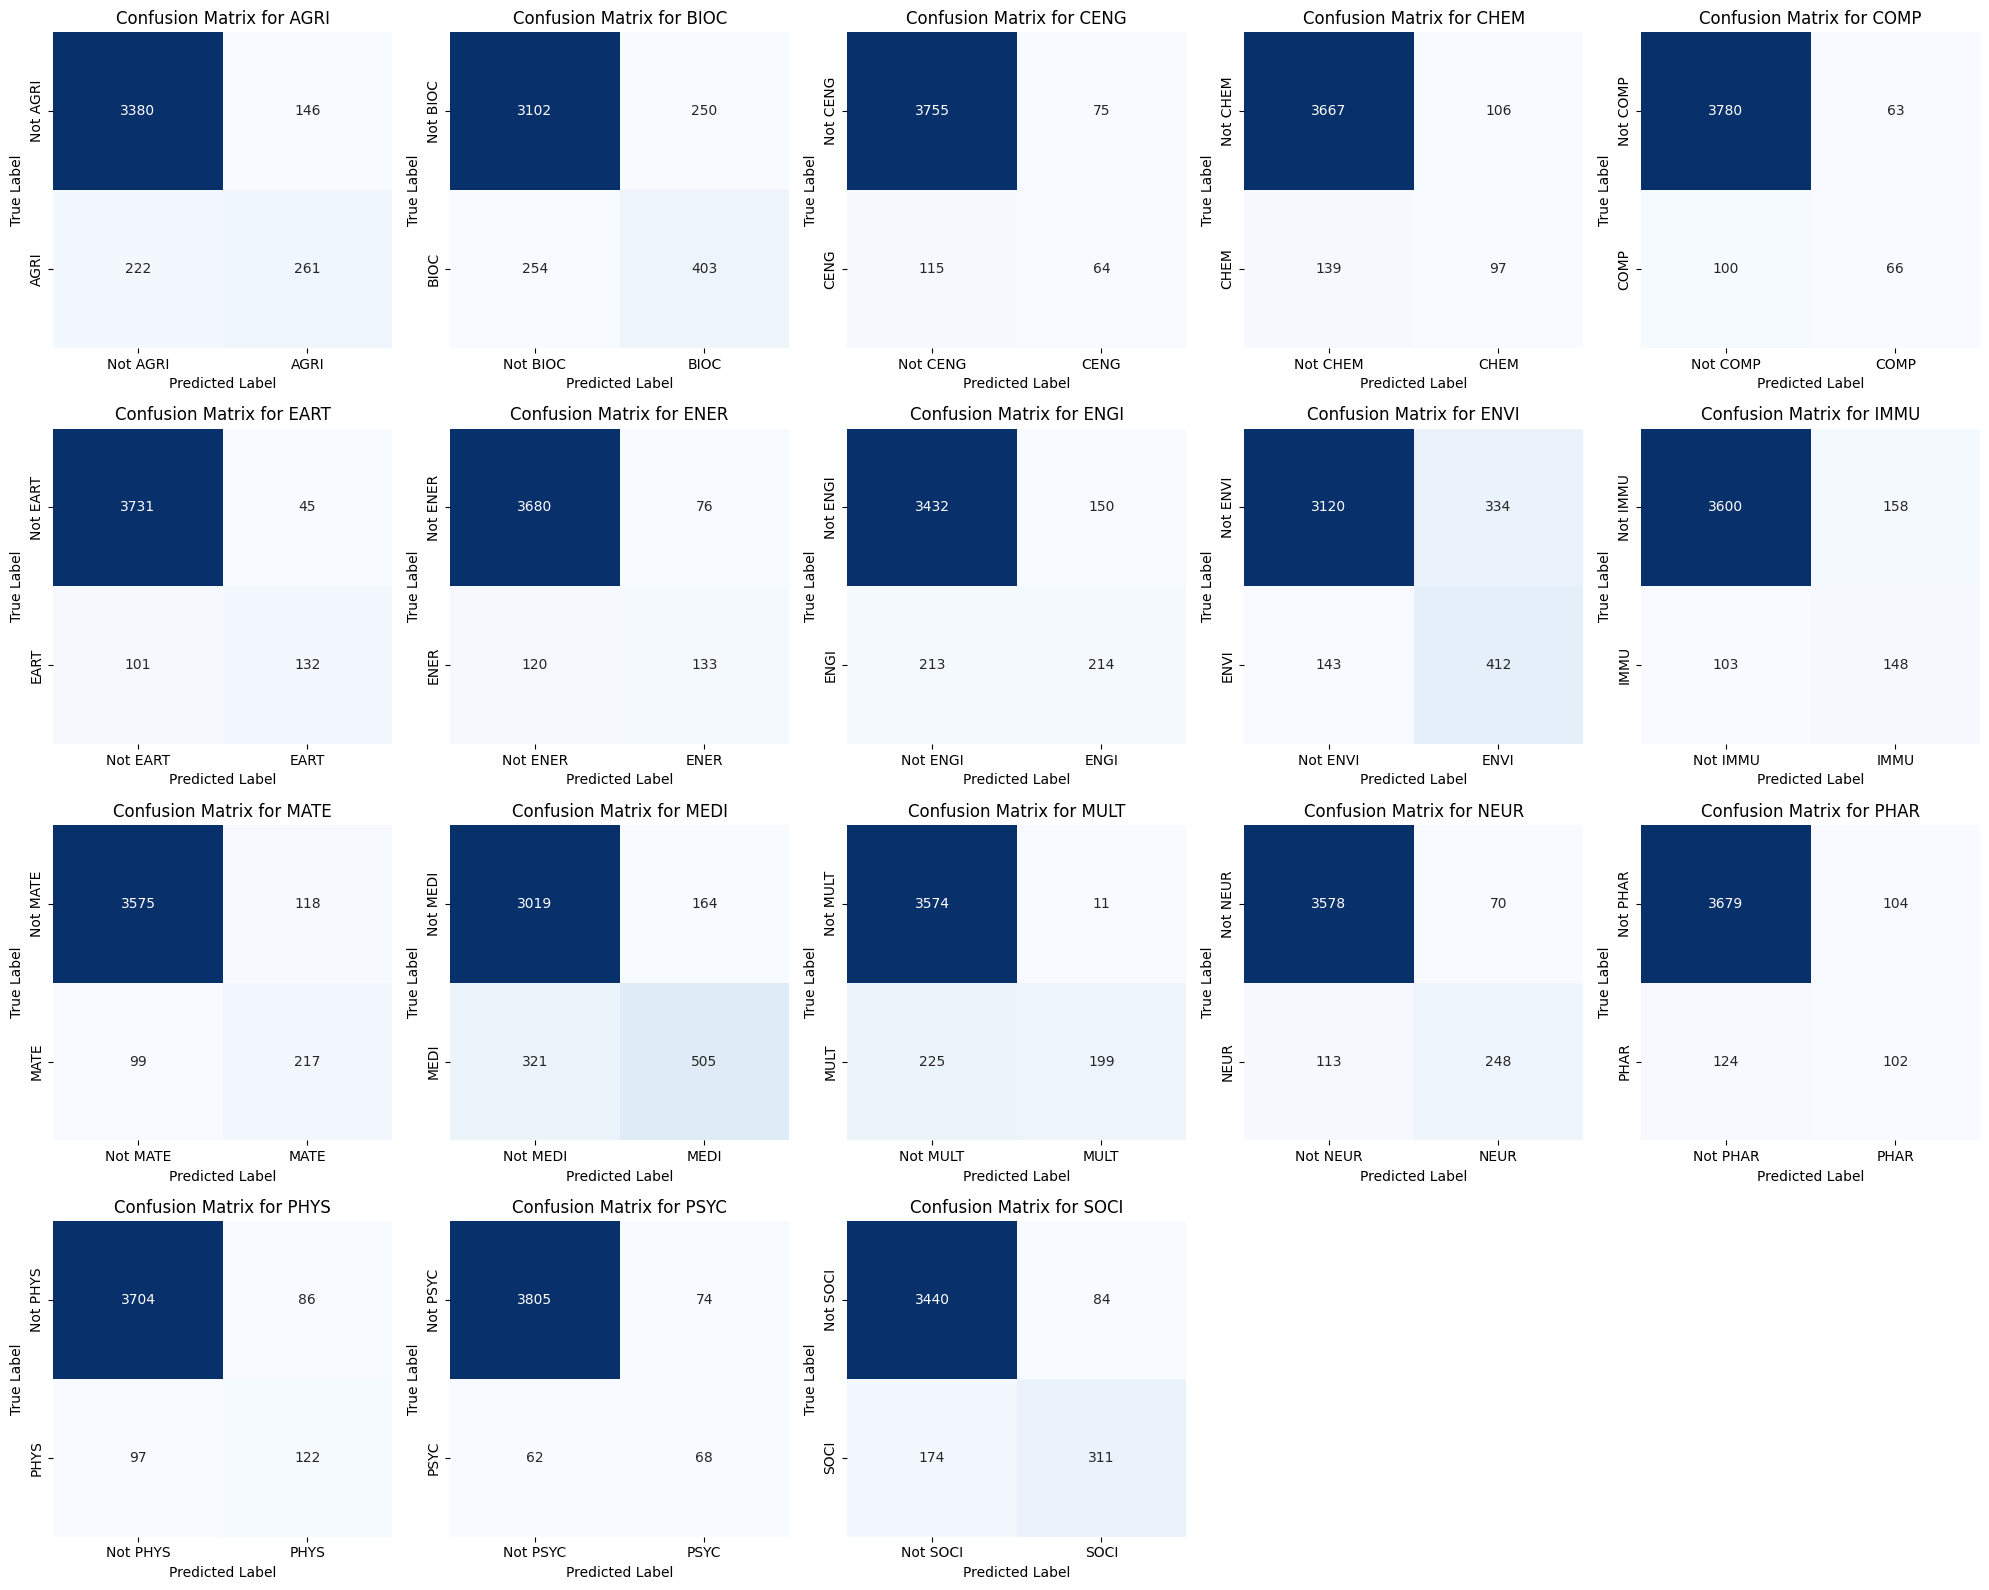

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))  # Set zero_division=1

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(scibert_model,
             [valid_encodings.input_ids, valid_encodings.attention_mask],
             val_labels,
             target_names)


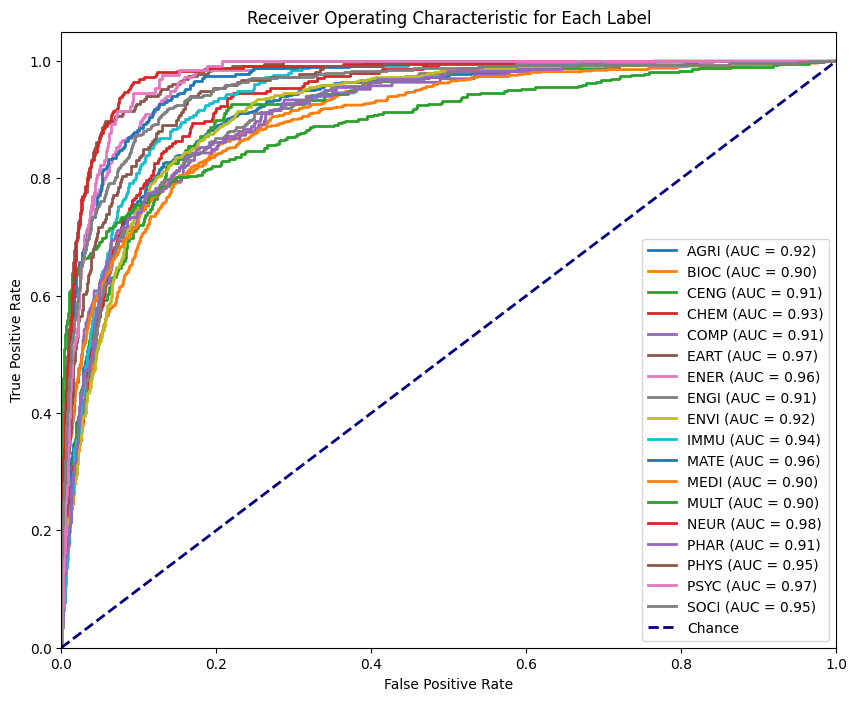

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(val_labels, val_predictions, target_names)


In [ ]:
test_score = scibert_model.evaluate([test_encodings.input_ids, test_encodings.attention_mask],
                                                  test_labels)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

126/126 [==============================] - 33s 261ms/step - loss: 0.1714 - accuracy: 0.5055
Test loss: 0.17137733101844788
Test accuracy: 0.5054890513420105


In [ ]:
test_predictions = scibert_model.predict([test_encodings.input_ids, test_encodings.attention_mask])

126/126 [==============================] - 32s 258ms/step


126/126 [==============================] - 32s 258ms/step
              precision    recall  f1-score   support

        AGRI       0.68      0.57      0.62       442
        BIOC       0.65      0.65      0.65       665
        CENG       0.44      0.31      0.36       184
        CHEM       0.53      0.48      0.51       238
        COMP       0.48      0.36      0.41       178
        EART       0.68      0.52      0.59       233
        ENER       0.64      0.52      0.57       260
        ENGI       0.61      0.53      0.57       444
        ENVI       0.52      0.71      0.60       550
        IMMU       0.47      0.61      0.53       223
        MATE       0.66      0.72      0.69       345
        MEDI       0.78      0.65      0.71       799
        MULT       0.98      0.44      0.60       410
        NEUR       0.75      0.69      0.72       308
        PHAR       0.53      0.48      0.50       227
        PHYS       0.55      0.52      0.53       217
        PSYC       0.46

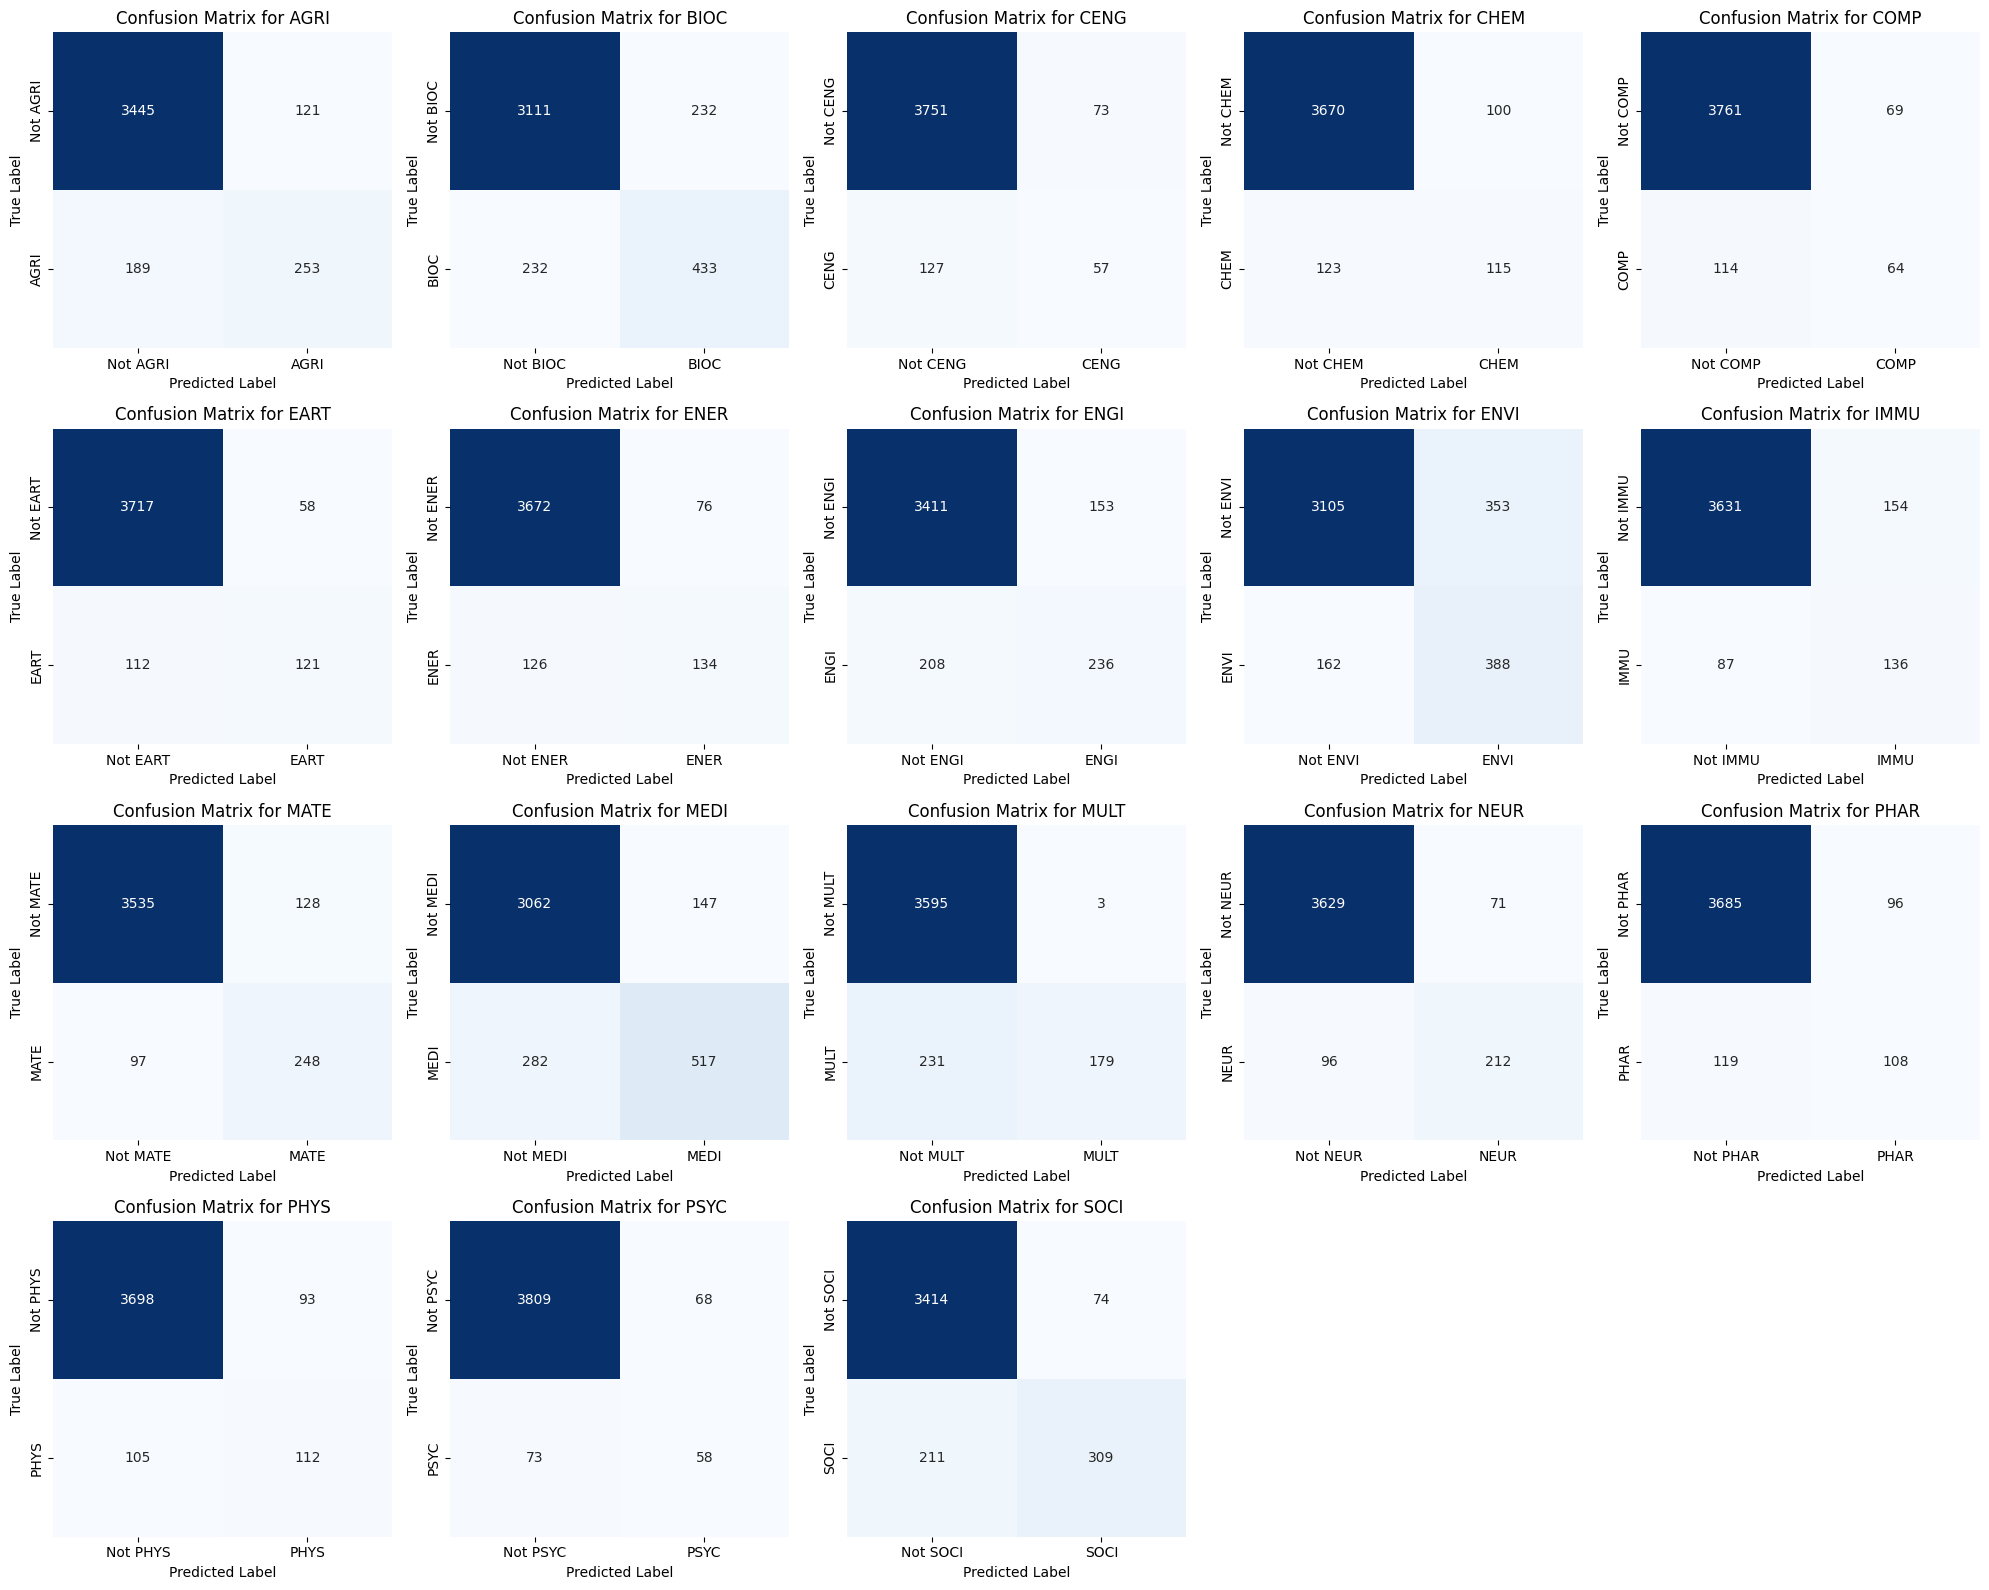

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))
    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(scibert_model,
             [test_encodings.input_ids, test_encodings.attention_mask],
             test_labels,
             target_names)


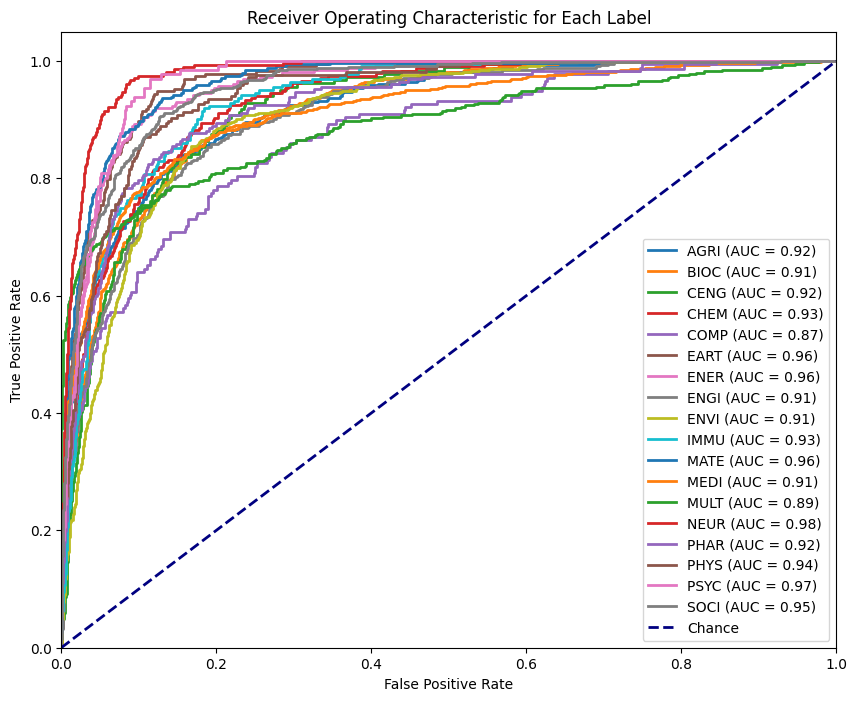

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(test_labels, test_predictions, target_names)


In [ ]:
!pip install google-auth

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path, threshold=0.5):
    """
    Process model predictions and save a CSV file with abstracts, true labels, predicted labels,
    the most probable predicted label, and its probability.

    Args:
        test_predictions (np.array): The predictions from the model, assumed to be probabilities.
        test_texts (list or np.array): The texts that were input to the model for prediction.
        test_df (pd.DataFrame): The original DataFrame containing the true labels.
        target_names (list): List of target class names corresponding to indices in model outputs.
        result_path (str, optional): Path to save the resulting CSV file. Defaults to './'.
        threshold (float, optional): Probability threshold to consider a prediction as positive. Defaults to 0.5.
    """
    predicted_labels = []
    max_probs = []
    max_labels = []

    for probs in test_predictions:
        # Identify labels exceeding the threshold
        labels = [target_names[idx] for idx, p in enumerate(probs) if p >= threshold]
        predicted_labels.append(labels)

        # Identify the max probability and corresponding label
        max_idx = np.argmax(probs)
        max_prob = probs[max_idx]
        max_label = target_names[max_idx]

        max_probs.append(max_prob)
        if labels:
            max_labels.append(max_label)
        else:
            max_probs[-1] = 0  # Reset max_prob if no labels meet the threshold
            max_labels.append("No Label")

    # Preparing the DataFrame
    result_df = pd.DataFrame({
        'abstract': test_texts,
        'true_label': test_df['subjareas'],
        'pred_label': predicted_labels,
        'max_pred_label': max_labels,
        'max_prediction_probability': max_probs
    })

    result_df['pred_label'] = result_df['pred_label'].apply(lambda x: ', '.join(x) if x else 'No Label')

    # Saving the results
    result_df.to_csv(result_path + 'scibert_unfreeze.csv', index=False)

    return result_df

result_path = '/content/drive/MyDrive/'
save_predictions_to_csv(test_predictions, concatenated_test_texts, test_df, target_names, result_path)


Mounted at /content/drive


,abstract,true_label,pred_label,max_pred_label,max_prediction_probability
0,The Virtual Cell Based Assay (VCBA) was applie...,[PHAR],"ENVI, PHAR",PHAR,0.799665
1,Modern clinical case reporting takes the form ...,[SOCI],SOCI,SOCI,0.509499
2,"In most economic sectors, increases in capital...",[AGRI],ENVI,ENVI,0.826176
3,This article offers statistical analyses of tr...,[MULT],MULT,MULT,0.733004
4,"In many research disciplines, hypothesis tests...",[MULT],COMP,COMP,0.688510
...,...,...,...,...,...
4003,Partial remission in patients newly diagnosed ...,[MULT],"MEDI, MULT",MEDI,0.849686
4004,Background: Wheat 1BL/1RS translocation lines ...,"[BIOC, IMMU]",BIOC,BIOC,0.598351
4005,The Sound Design Toolkit is a collection of ph...,[COMP],COMP,COMP,0.590102
4006,In the unbundled national electricity markets ...,[SOCI],"ENER, ENVI",ENER,0.803442
